In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/DAAM/

[Errno 2] No such file or directory: '/content/drive/MyDrive/DAAM/'
/content


In [3]:
import os

if(not os.path.exists("/content/drive/MyDrive/DAAM/stanford-corenlp-4.5.4.zip")):
  !wget https://nlp.stanford.edu/software/stanford-corenlp-4.5.4.zip

if(not os.path.exists("/content/drive/MyDrive/DAAM/stanford-corenlp-4.5.4")):
  !unzip stanford-corenlp-4.5.4.zip


--2023-09-28 11:41:57--  https://nlp.stanford.edu/software/stanford-corenlp-4.5.4.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://downloads.cs.stanford.edu/nlp/software/stanford-corenlp-4.5.4.zip [following]
--2023-09-28 11:41:58--  https://downloads.cs.stanford.edu/nlp/software/stanford-corenlp-4.5.4.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 506470124 (483M) [application/zip]
Saving to: ‘stanford-corenlp-4.5.4.zip’

stanford-corenlp-4. 100%[===================>] 483.01M  5.10MB/s    in 98s     

2023-09-28 11:43:45 (4.93 MB/s) - ‘stanford-corenlp-4.5.4.zip’ saved [506470124/506470124]

Archive:  stanford-corenlp-4.5.4.zip
  

In [4]:
!pip install stanza
import stanza
stanza.install_corenlp(dir='stanford-corenlp-4.5.4')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 1.8 MB/s eta 0:00:00


In [5]:
!pip install daam==0.1.0

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 125.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.3/298.3 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
if(not os.path.exists("/content/drive/MyDrive/DAAM/annotations_trainval2014.zip")):
  !wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip

--2023-09-28 11:44:17--  http://images.cocodataset.org/annotations/annotations_trainval2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.201.201, 54.231.164.217, 52.216.206.67, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.201.201|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252872794 (241M) [application/zip]
Saving to: ‘annotations_trainval2014.zip’

annotations_trainva 100%[===================>] 241.16M  16.7MB/s    in 17s     

2023-09-28 11:44:35 (14.2 MB/s) - ‘annotations_trainval2014.zip’ saved [252872794/252872794]



# Visuosemantic Analyses

## Adjectival Entanglement

In [7]:

from diffusers import StableDiffusionPipeline
from matplotlib import pyplot as plt
import numpy as np
import time
import torch
import random
import daam

def set_seed(seed):
    # gen = torch.Generator(device='cuda')

    # https://discuss.huggingface.co/t/how-do-i-fix-the-runtimeerror-cuda-error-cuda-driver-version-is-insufficient-for-cuda-runtime-version-cuda-kernel-errors-might-be-asynchronously-reported-at-some-other-api-call-so-the-stacktrace-below-might-be-incorrect-error/31339/3
    if torch.cuda.is_available():
      gen = torch.Generator('cuda')
    else:
      gen = torch.Generator()

    random.seed(seed)
    np.random.seed(seed)
    torch.cuda.manual_seed(seed)
    torch.manual_seed(seed)

    return gen.manual_seed(s)

model = StableDiffusionPipeline.from_pretrained('stabilityai/stable-diffusion-2-base')
model = model.to('cuda:0')

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

In [8]:
def make_im_subplots(*args):
    fig, ax = plt.subplots(*args)

    for ax_ in ax.flatten():
        ax_.set_xticks([])
        ax_.set_yticks([])

    return fig, ax

### Car

In [9]:
%cd '/content/drive/MyDrive/DAAM/results/part_05/Adjectival Entanglement/car/'

[Errno 2] No such file or directory: '/content/drive/MyDrive/DAAM/results/part_05/Adjectival Entanglement/car/'
/content


In [10]:
s = int(time.time())
gen = set_seed(s)

with daam.trace(model, save_heads=True) as trc:
    blue_image = model('a blue car driving down the street', num_inference_steps=20, generator=gen).images[0]
    blue_map = trc.compute_global_heat_map().compute_word_heat_map('blue')

gen = set_seed(s)

with daam.trace(model, load_heads=True) as trc:
    green_image = model('a green car driving down the street', num_inference_steps=20, generator=gen).images[0]
    green_map = trc.compute_global_heat_map().compute_word_heat_map('green')

gen = set_seed(s)

with daam.trace(model, load_heads=True) as trc:
    red_image = model('a red car driving down the street', num_inference_steps=20, generator=gen).images[0]
    red_map = trc.compute_global_heat_map().compute_word_heat_map('red')

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [11]:
blue_image.save('blue_car_image.bmp')
green_image.save('green_car_image.bmp')
red_image.save('red_car_image.bmp')

torch.save(blue_map.heatmap, 'blue_car_map.pt')
torch.save(green_map.heatmap, 'green_car_map.pt')
torch.save(red_map.heatmap, 'red_car_map.pt')

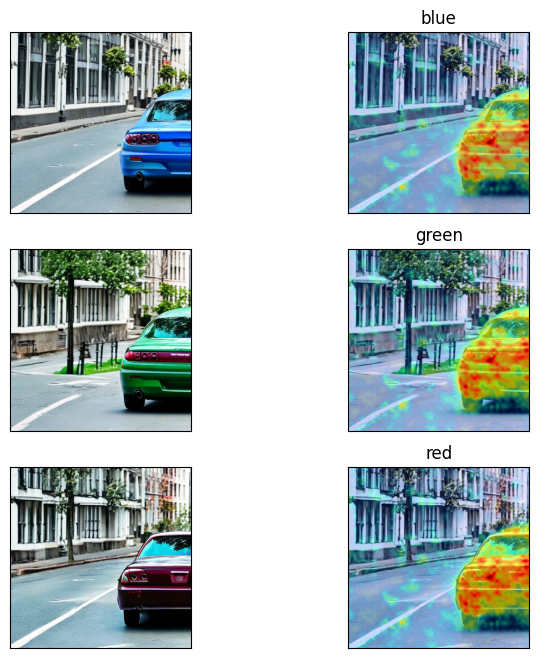

In [12]:
plt.rcParams['figure.figsize'] = (8, 8)
fig, ax = make_im_subplots(3, 2)

# Original images
ax[0, 0].imshow(blue_image)
ax[1, 0].imshow(green_image)
ax[2, 0].imshow(red_image)

# Heat map
blue_map.plot_overlay(blue_image, ax=ax[0, 1])
green_map.plot_overlay(green_image, ax=ax[1, 1])
red_map.plot_overlay(red_image, ax=ax[2, 1])

plt.show()

## House

In [13]:
%cd '/content/drive/MyDrive/DAAM/results/part_05/Adjectival Entanglement/house/'

[Errno 2] No such file or directory: '/content/drive/MyDrive/DAAM/results/part_05/Adjectival Entanglement/house/'
/content


In [47]:
s = int(time.time())
gen = set_seed(s)

with daam.trace(model, save_heads=True) as trc:
    blue_model = model('three blue house in the forest', num_inference_steps=50, generator=gen)
    torch.save(blue_model, 'blue_house_model.pt')
    blue_image = blue_model.images[0]
    blue_image.save('blue_house_image.bmp')
    blue_map = trc.compute_global_heat_map().compute_word_heat_map('blue')
    torch.save(blue_map.heatmap, 'blue_house_map.pt')

gen = set_seed(s)

with daam.trace(model, load_heads=True) as trc:
    green_model = model('three green house in the forest', num_inference_steps=50, generator=gen)
    torch.save(green_model, 'green_house_model.pt')
    green_image = green_model.images[0]
    green_image.save('green_house_image.bmp')
    green_map = trc.compute_global_heat_map().compute_word_heat_map('green')
    torch.save(green_map.heatmap, 'green_house_map.pt')

gen = set_seed(s)

with daam.trace(model, load_heads=True) as trc:
    red_model = model('three red house in the forest', num_inference_steps=50, generator=gen)
    torch.save(red_model, 'red_house_model.pt')
    red_image = red_model.images[0]
    red_image.save('red_house_image.bmp')
    red_map = trc.compute_global_heat_map().compute_word_heat_map('red')
    torch.save(red_map.heatmap, 'red_house_map.pt')

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

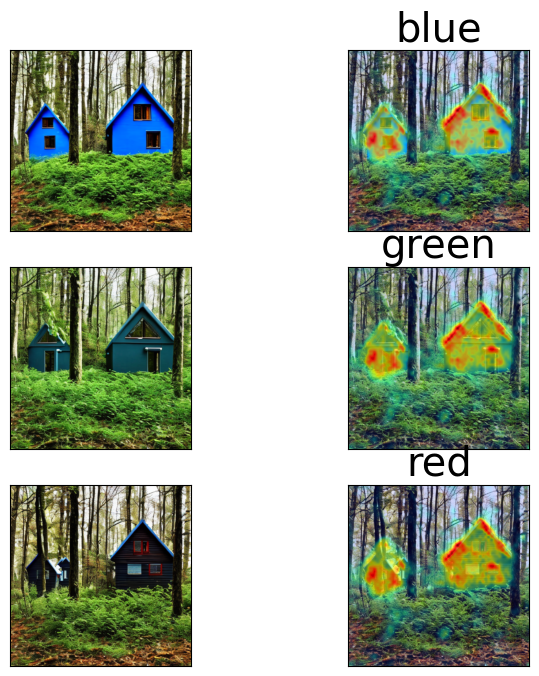

In [48]:
plt.rcParams['figure.figsize'] = (8, 8)
fig, ax = make_im_subplots(3, 2)

# Original images
ax[0, 0].imshow(blue_image)
ax[1, 0].imshow(green_image)
ax[2, 0].imshow(red_image)

# Heat map
blue_map.plot_overlay(blue_image, ax=ax[0, 1])
green_map.plot_overlay(green_image, ax=ax[1, 1])
red_map.plot_overlay(red_image, ax=ax[2, 1])

plt.show()
fig.savefig('house_result.png')

## Cohyponym Entanglement

### Zebra-Giraffe & Crab-Lobster

In [37]:
with daam.trace(model, save_heads=True) as trc:
    zebra_giraffe_model = model('a zebra and a giraffe', num_inference_steps=50)
    torch.save(zebra_giraffe_model, 'zebra_giraffe_model.pt')
    im1 = zebra_giraffe_model.images[0] # need to load zebra_giraffe_model and get other image
    im1.save('zebra_giraffe_image.bmp')
    heat_map = trc.compute_global_heat_map() # need to load global_heat_map.pt instead of computing again
    torch.save(heat_map.heat_maps, 'zebra_giraffe_global_heat_map.pt')

    zebra_map = heat_map.compute_word_heat_map('zebra')
    torch.save(zebra_map, 'zebra_map.pt')
    giraffe_map = heat_map.compute_word_heat_map('giraffe')
    torch.save(giraffe_map, 'giraffe_map.pt')

with daam.trace(model, save_heads=True) as trc:
    crab_lobster_model = model('a crab and a lobster', num_inference_steps=50)
    torch.save(crab_lobster_model, 'crab_lobster_model.pt')
    im2 = crab_lobster_model.images[0]
    im2.save('crab_lobster_image.bmp')
    heat_map = trc.compute_global_heat_map()
    torch.save(heat_map.heat_maps, 'crab_lobster_global_heat_map.pt')

    crab_map = heat_map.compute_word_heat_map('crab')
    torch.save(crab_map, 'crab_map.pt')
    lobster_map = heat_map.compute_word_heat_map('lobster')
    torch.save(lobster_map, 'lobster_map.pt')

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

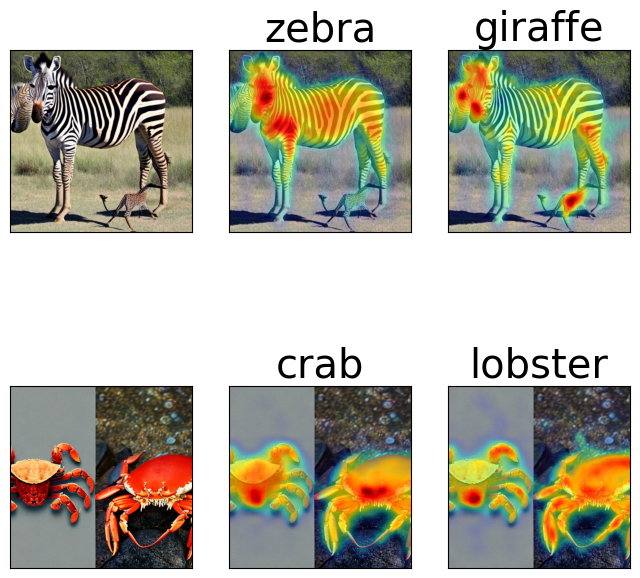

In [38]:
plt.rcParams['figure.figsize'] = (8, 8)
fig, ax = make_im_subplots(2, 3)

ax[0, 0].imshow(im1)
ax[1, 0].imshow(im2)
zebra_map.plot_overlay(im1, ax=ax[0, 1])
giraffe_map.plot_overlay(im1, ax=ax[0, 2])

crab_map.plot_overlay(im2, ax=ax[1, 1])
lobster_map.plot_overlay(im2, ax=ax[1, 2])

plt.show()
fig.savefig('Zebra-Giraffe_Crab-Lobster_result.png')

[Errno 2] No such file or directory: '/content/drive/MyDrive/DAAM/results/part_05/Cohyponym Entanglement/Zebra-Giraffe & Crab-Lobster/'
/content


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 4>:4                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: 'NoneType' object has no attribute 'save'

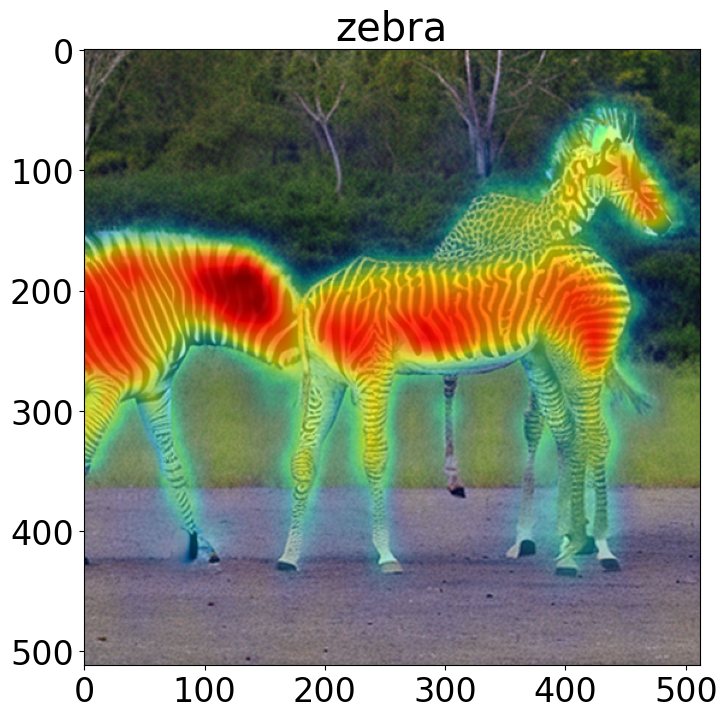

In [18]:
%cd '/content/drive/MyDrive/DAAM/results/part_05/Cohyponym Entanglement/Zebra-Giraffe & Crab-Lobster/'

zebra_heat_map = zebra_map.plot_overlay(im1)
zebra_heat_map.save('zebra_heatmap_image.bmp')

giraffe_heat_map = giraffe_map.plot_overlay(im1)
giraffe_heat_map.save('giraffe_heatmap_image.bmp')

crab_heat_map = crab_map.plot_overlay(im2)
crab_heat_map.save('crab_heatmap_image.bmp')

lobster_heat_map = lobster_map.plot_overlay(im2)
lobster_heat_map.save('lobster_heatmap_image.bmp')

### Zebra-Fridge & Crab-BeachBall

In [24]:
%cd '/content/drive/MyDrive/DAAM/results/part_05/Cohyponym Entanglement/Zebra-Fridge & Crab-BeachBall/'

[Errno 2] No such file or directory: '/content/drive/MyDrive/DAAM/results/part_05/Cohyponym Entanglement/Zebra-Fridge & Crab-BeachBall/'
/content


In [53]:
with daam.trace(model, save_heads=True) as trc:
    zebra_fridge_model = model('a bear and a panda', num_inference_steps=50)
    torch.save(zebra_fridge_model, 'zebra_fridge_model.pt')
    im1 = zebra_fridge_model.images[0]
    im1.save('zebra_fridge_image.bmp')
    heat_map = trc.compute_global_heat_map()
    torch.save(heat_map.heat_maps, 'zebra_fridge_global_heat_map.pt')

    zebra_map = heat_map.compute_word_heat_map('bear')
    torch.save(zebra_map, 'zebra_map_2.pt')
    giraffe_map = heat_map.compute_word_heat_map('panda')
    torch.save(giraffe_map, 'giraffe_map_2.pt')

with daam.trace(model, save_heads=True) as trc:
    crab_beach_ball_model = model('a crab and a beach ball', num_inference_steps=50)
    torch.save(crab_beach_ball_model, 'crab_beach_ball_model.pt')
    im2 = crab_beach_ball_model.images[0]
    im2.save('crab_beach_ball_image.bmp')
    heat_map = trc.compute_global_heat_map()
    torch.save(heat_map.heat_maps, 'crab_beach_ball_global_heat_map.pt')

    crab_map = heat_map.compute_word_heat_map('crab')
    torch.save(crab_map, 'crab_map_2.pt')
    lobster_map = heat_map.compute_word_heat_map('ball')
    torch.save(lobster_map, 'lobster_map_2.pt')

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

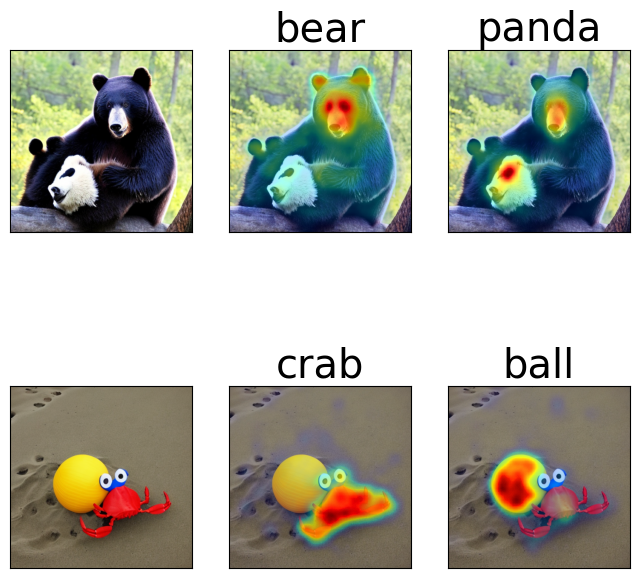

In [54]:
plt.rcParams['figure.figsize'] = (8, 8)
fig, ax = make_im_subplots(2, 3)

ax[0, 0].imshow(im1)
ax[1, 0].imshow(im2)
zebra_map.plot_overlay(im1, ax=ax[0, 1])
giraffe_map.plot_overlay(im1, ax=ax[0, 2])

crab_map.plot_overlay(im2, ax=ax[1, 1])
lobster_map.plot_overlay(im2, ax=ax[1, 2])

plt.show()